In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Decision Tree

Loading images from folder: /content/drive/MyDrive/fruits,animals/train_zip/train
Error processing image /content/drive/MyDrive/fruits,animals/train_zip/train/.ipynb_checkpoints: [Errno 21] Is a directory: '/content/drive/MyDrive/fruits,animals/train_zip/train/.ipynb_checkpoints'


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Loading images from folder: /content/drive/MyDrive/fruits,animals/test_zip/test
Train images shape: (408, 224, 224, 3)
Test images shape: (74, 224, 224, 3)
Accuracy: 0.6621621621621622


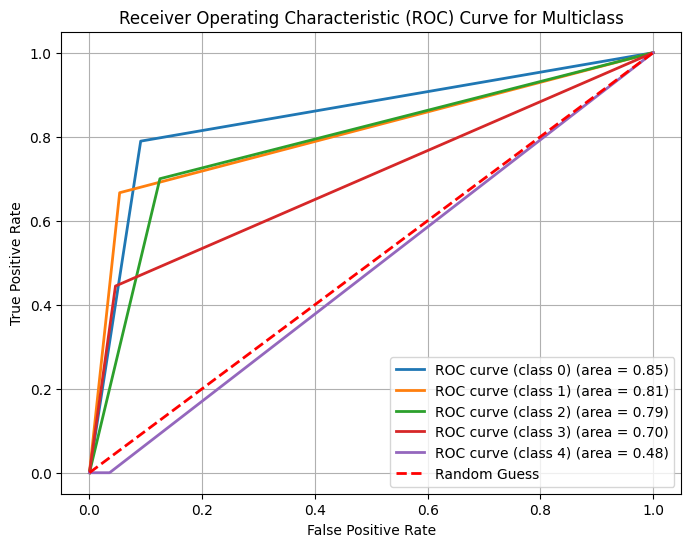

In [ ]:
import os
import numpy as np
from sklearn.metrics import accuracy_score, roc_curve, auc
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Define image directories - Update with your drive path
train_dir = '/content/drive/MyDrive/fruits,animals/train_zip/train'
test_dir = '/content/drive/MyDrive/fruits,animals/test_zip/test'

def load_images(directory):
    images = []
    labels = []
    print(f"Loading images from folder: {directory}")
    for img_file in os.listdir(directory):
        if img_file.endswith('.xml'):
            continue
        img_path = os.path.join(directory, img_file)
        try:
            img = image.load_img(img_path, target_size=(224, 224))
            img_array = image.img_to_array(img)
            img_array = preprocess_input(img_array)
            images.append(img_array)

            # Extract class label from filename
            class_label = img_file.split('_')[0]  # Assuming the class label is before the underscore
            labels.append(class_label)
        except Exception as e:
            print(f"Error processing image {img_path}: {e}")
            continue
    return np.array(images), np.array(labels)

# Load and preprocess train and test images
train_images, train_labels = load_images(train_dir)
test_images, test_labels = load_images(test_dir)

# Debugging: Print the shape of loaded images
print("Train images shape:", train_images.shape)
print("Test images shape:", test_images.shape)

# Flatten the images for Decision Tree Classifier
if train_images.size != 0 and test_images.size != 0:
    train_images_flatten = train_images.reshape(train_images.shape[0], -1)
    test_images_flatten = test_images.reshape(test_images.shape[0], -1)

    # Initialize Decision Tree Classifier
    clf = DecisionTreeClassifier(
        criterion='gini',        # Split criterion: 'gini' or 'entropy'
        max_depth=None,          # Maximum depth of the tree
        min_samples_split=2,     # Minimum samples required to split a node
        min_samples_leaf=1,      # Minimum samples required in a leaf node
        random_state=43        # Random state for reproducibility
    )

    # Train the Decision Tree Classifier
    clf.fit(train_images_flatten, train_labels)

    # Calculate accuracy
    test_predictions = clf.predict(test_images_flatten)
    accuracy = accuracy_score(test_labels, test_predictions)
    print(f"Accuracy: {accuracy}")

    # Predict probabilities for each class on test data
    predictions = clf.predict_proba(test_images_flatten)

    # Convert labels to binary format for one-vs-rest strategy
    binarized_labels = label_binarize(test_labels, classes=np.unique(test_labels))

    # Calculate FPR and TPR for each class using one-vs-rest strategy
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(len(np.unique(test_labels))):
        fpr[i], tpr[i], _ = roc_curve(binarized_labels[:, i], predictions[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    plt.figure(figsize=(8, 6))

    for i in range(len(np.unique(test_labels))):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (class {i}) (area = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()


else:
    print("No images loaded. Check directory paths or image loading process.")


Saving apple_81.jpg to apple_81.jpg
The uploaded image belongs to class: apple


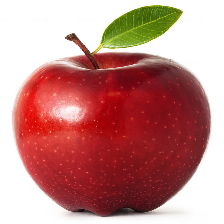

In [ ]:
from google.colab import files

# Upload an image
uploaded = files.upload()

# Assuming you uploaded a single image file, use the first file
uploaded_files = list(uploaded.keys())
if uploaded_files:
    uploaded_image_path = uploaded_files[0]
    try:
        img = image.load_img(uploaded_image_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = preprocess_input(img_array)

        # Reshape the image array to match the classifier input shape
        img_array_flatten = img_array.reshape(1, -1)

        # Make prediction using the trained Decision Tree Classifier
        prediction = clf.predict(img_array_flatten)

        # Print the predicted class
        print(f"The uploaded image belongs to class: {prediction[0]}")

        # Display the uploaded image
        display(img)
    except Exception as e:
        print(f"Error processing the uploaded image: {e}")
else:
    print("No image uploaded.")


Random Forest

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading images from folder: /content/drive/MyDrive/fruits,animals/train_zip/train
Error processing image /content/drive/MyDrive/fruits,animals/train_zip/train/.ipynb_checkpoints: [Errno 21] Is a directory: '/content/drive/MyDrive/fruits,animals/train_zip/train/.ipynb_checkpoints'


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Loading images from folder: /content/drive/MyDrive/fruits,animals/test_zip/test
Train images shape: (408, 224, 224, 3)
Test images shape: (74, 224, 224, 3)


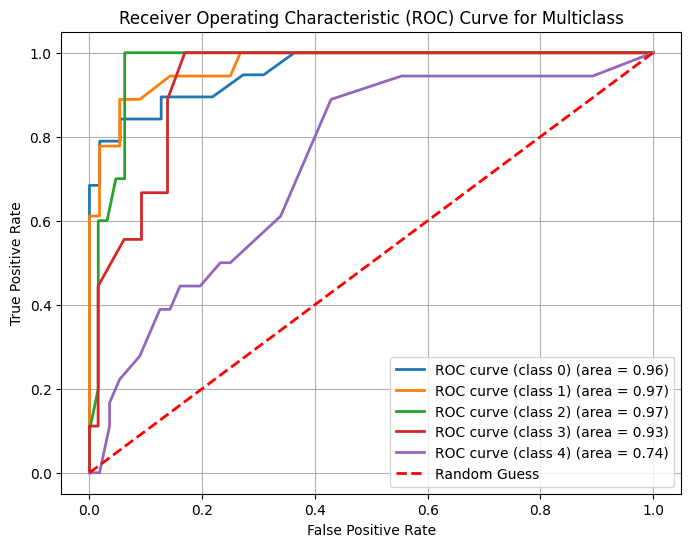

Accuracy: 0.8108108108108109


In [ ]:
import os
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize  # Import label_binarize



# Mount Google Drive to access files
drive.mount('/content/drive')

# Define image directories - Update with your drive path
train_dir = '/content/drive/MyDrive/fruits,animals/train_zip/train'
test_dir = '/content/drive/MyDrive/fruits,animals/test_zip/test'

def load_images(directory):
    images = []
    labels = []
    print(f"Loading images from folder: {directory}")
    for img_file in os.listdir(directory):
        if img_file.endswith('.xml'):
            continue
        img_path = os.path.join(directory, img_file)
        try:
            img = image.load_img(img_path, target_size=(224, 224))
            img_array = image.img_to_array(img)
            img_array = preprocess_input(img_array)
            images.append(img_array)

            # Extract class label from filename
            class_label = img_file.split('_')[0]  # Assuming the class label is before the underscore
            labels.append(class_label)
        except Exception as e:
            print(f"Error processing image {img_path}: {e}")
            continue
    return np.array(images), np.array(labels)

# Load and preprocess train and test images
train_images, train_labels = load_images(train_dir)
test_images, test_labels = load_images(test_dir)

# Debugging: Print the shape of loaded images
print("Train images shape:", train_images.shape)
print("Test images shape:", test_images.shape)

# Flatten the images for Random Forest Classifier
if train_images.size != 0 and test_images.size != 0:
    train_images_flatten = train_images.reshape(train_images.shape[0], -1)
    test_images_flatten = test_images.reshape(test_images.shape[0], -1)

# Initialize Random Forest Classifier
    clf = RandomForestClassifier(
    n_estimators=100,  # Number of trees in the forest (you can adjust this)
    criterion='gini',  # Split criterion: 'gini' or 'entropy'
    max_depth=None,    # Maximum depth of the trees (or None if unlimited)
    min_samples_split=2,  # Minimum number of samples required to split an internal node
    min_samples_leaf=1,   # Minimum number of samples required to be at a leaf node
    random_state=41    # Seed used by the random number generator for reproducibility
)

    # Train the Random Forest Classifier
    clf.fit(train_images_flatten, train_labels)

    # Convert string labels to integer labels
    label_mapping = {label: idx for idx, label in enumerate(np.unique(test_labels))}
    test_labels_encoded = np.array([label_mapping[label] for label in test_labels])

    # Calculate probabilities for each class on test data
    predictions_proba = clf.predict_proba(test_images_flatten)

    # Convert labels to binary format for one-vs-rest strategy
    binarized_labels = label_binarize(test_labels_encoded, classes=np.unique(test_labels_encoded))

    # Calculate FPR and TPR for each class using one-vs-rest strategy
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(len(np.unique(test_labels_encoded))):
        fpr[i], tpr[i], _ = roc_curve(binarized_labels[:, i], predictions_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    plt.figure(figsize=(8, 6))

    for i in range(len(np.unique(test_labels_encoded))):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (class {i}) (area = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    # Calculate accuracy
    test_predictions = clf.predict(test_images_flatten)
    accuracy = accuracy_score(test_labels, test_predictions)
    print(f"Accuracy: {accuracy}")
else:
    print("No images loaded. Check directory paths or image loading process.")


Saving dogs_033.jpg to dogs_033.jpg
The uploaded image belongs to class: dogs


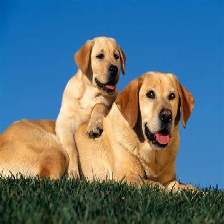

In [ ]:
from google.colab import files

# Upload an image
uploaded = files.upload()

# Assuming you uploaded a single image file, use the first file
uploaded_files = list(uploaded.keys())
if uploaded_files:
    uploaded_image_path = uploaded_files[0]
    try:
        img = image.load_img(uploaded_image_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = preprocess_input(img_array)

        # Reshape the image array to match the classifier input shape
        img_array_flatten = img_array.reshape(1, -1)

        # Make prediction using the trained Decision Tree Classifier
        prediction = clf.predict(img_array_flatten)

        # Print the predicted class
        print(f"The uploaded image belongs to class: {prediction[0]}")

        # Display the uploaded image
        display(img)
    except Exception as e:
        print(f"Error processing the uploaded image: {e}")
else:
    print("No image uploaded.")